In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
import pickle 

In [2]:
df= pd.read_csv("emails.csv.zip")
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


# 0==ham   1==spam

In [3]:
df['spam'].value_counts()
df['text'][5724]

'Subject: re : receipts from visit  jim ,  thanks again for the invitation to visit lsu .  shirley will fedex the receipts tomorrow .  vince  " james r . garven " on 02 / 08 / 2000 07 : 00 : 50 pm  to : vince j kaminski  cc :  subject : receipts from visit  dear vince ,  thanks again for taking the time to visit . ? both faculty and students got a  lot out of your presentations .  i have a favor to ask concerning the expense reimbursement process . ? can you  mail all travel and lodging receipts to my secretary joan payne at the  following address :  joan payne  department of finance  2163 ceba  louisiana state university  baton rouge , la ? 70803  thanks ,  jim garven  james r . garven  william h . wright , jr . endowed chair for financial services  department of finance  2158 ceba  e . j . ourso college of business administration  louisiana state university  baton rouge , la ? 70803 - 6308  voice ( 225 ) 388 - 0477 ? | ? fax : ( 800 ) 859 - 6361  e - mail : ? jgarven @ lsu . edu  hom

Text(0.5, 1.0, 'spam and ham value count')

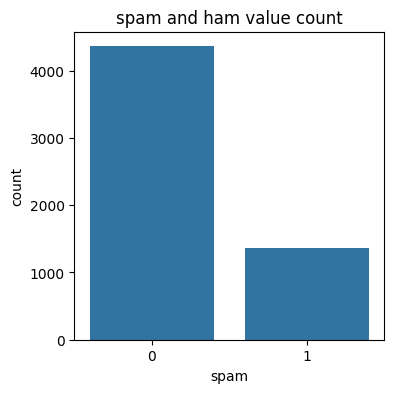

In [4]:
plt.figure(figsize=(4,4))
sns.barplot(df['spam'].value_counts())
plt.title('spam and ham value count')

Data is small and Imbalanced

In [5]:
spam = df[df['spam']==1]
ham = df[df['spam']==0]
print(spam['text'])

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
1363    Subject: are you ready to get it ?  hello !  v...
1364    Subject: would you like a $ 250 gas card ?  do...
1365    Subject: immediate reply needed  dear sir ,  i...
1366    Subject: wanna see me get fisted ?  fist  bang...
1367    Subject: hot stock info : drgv announces anoth...
Name: text, Length: 1368, dtype: object


In [12]:
##  Count most repeated woreds in Spam  messages

import re 
from collections import Counter
from wordcloud import WordCloud , STOPWORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

all_text = ' '.join(spam['text'].values)

all_text = re.sub(r'[^A-Za-z\s]', '', all_text)

# Additional cleaning (removing stop words)
 
feature_text = ' '.join([stemmer.stem(word) for word in all_text.split() if word.lower() not in ENGLISH_STOP_WORDS
])

count_word = Counter(feature_text.split())
top_words = count_word.most_common(10)
arranged_word = pd.Series(top_words)
print("most repeated words in spam messages: ",arranged_word)

most repeated words in spam messages:  0    (subject, 1577)
1          (s, 1333)
2    (compani, 1065)
3         (com, 999)
4        (mail, 917)
5        (busi, 897)
6       (email, 865)
7      (inform, 818)
8      (receiv, 727)
9           (e, 698)
dtype: object


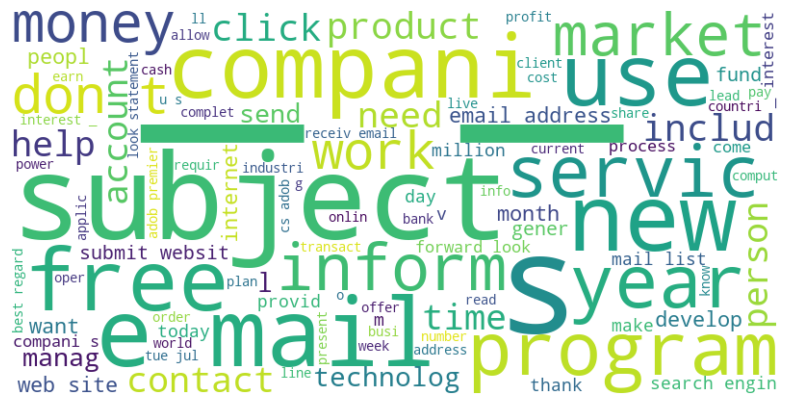

In [15]:
##  most repeated word in spam messages
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

all_text = ' '.join(spam['text'].values)

# Additional cleaning (removing stop words)
filtered_words = ' '.join([stemmer.stem(word) for word in all_text.split() if word.lower() not in ENGLISH_STOP_WORDS])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(filtered_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
##  Count most repeated woreds in Ham  messages

all_text = ' '.join(ham['text'].values)

all_text = re.sub(r'[^A-Za-z\s]', '', all_text)

# Additional cleaning (removing stop words)
 
feature_text = ' '.join([stemmer.stem(word) for word in all_text.split() if word.lower() not in ENGLISH_STOP_WORDS
])

count_word = Counter(feature_text.split())
top_words = count_word.most_common(10)
arranged_word = pd.Series(top_words)
print("most repeated words in Ham messages: ",arranged_word)


most repeated words in Ham messages:  0      (enron, 13388)
1        (ect, 11417)
2     (subject, 8625)
3        (vinc, 8531)
4         (hou, 5569)
5           (s, 5173)
6    (kaminski, 4801)
7         (com, 4444)
8          (cc, 3889)
9           (j, 3693)
dtype: object


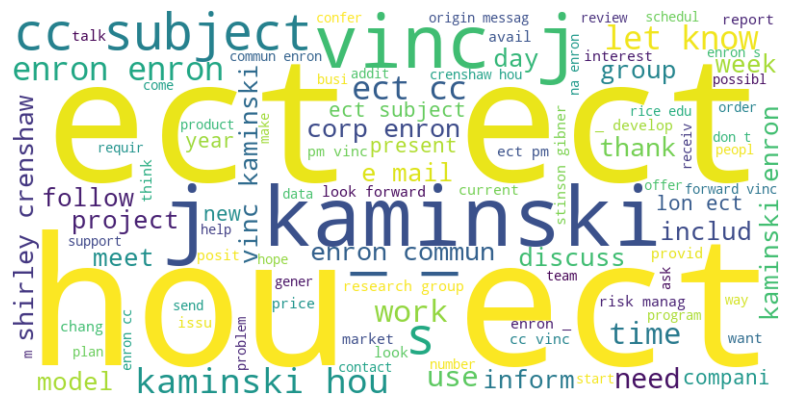

In [14]:
##  most repeated word in ham messages

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

all_text = ' '.join(ham['text'].values)

# Additional cleaning (removing stop words)
filtered_words = ' '.join([stemmer.stem(word) for word in all_text.split() if word.lower() not in ENGLISH_STOP_WORDS])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(filtered_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [ ]:
df[df['spam']==1]

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [ ]:
df.info
#df["spam"].dtype

<bound method DataFrame.info of                                                    text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]>

In [ ]:
x=df['text']
y=df['spam']
x_train,x_temp,y_train,y_temp = train_test_split(x,y,random_state=42,train_size=0.7,stratify=y)   
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,random_state=42,test_size=0.5)

In [ ]:
print(f"shape of train data: {x_train.shape}")
print(f"shape of test data: {x_test.shape}")
print(f"shape of validation data: {x_val.shape}")

shape of train data: (4009,)
shape of test data: (860,)
shape of validation data: (859,)


In [ ]:
print(" train data shape \n", y_train.value_counts(),"\ntest data shape \n ",y_test.value_counts(),"\nvalidation data shape\n",y_val.value_counts())

 train data shape 
 spam
0    3052
1     957
Name: count, dtype: int64 
test data shape 
  spam
0    653
1    207
Name: count, dtype: int64 
validation data shape
 spam
0    655
1    204
Name: count, dtype: int64


In [ ]:
##  Feature Extraction
vectorize=TfidfVectorizer()
x_train_matrix= vectorize.fit_transform(x_train)
x_test_matrix= vectorize.transform(x_test)
x_val_matrix= vectorize.transform(x_val)

In [ ]:
print(x_train_matrix.shape)

(4009, 31850)


In [ ]:
classification= LogisticRegression()
classifier = MultinomialNB()

In [ ]:
classification.fit(x_train_matrix,y_train)
classifier.fit(x_train_matrix,y_train)

MultinomialNB()

In [ ]:
y_pred = classification.predict(x_train_matrix)
y_pred2 = classifier.predict(x_train_matrix)

y_pred_val = classification.predict(x_val_matrix)
y_pred_val2 = classifier.predict(x_val_matrix)

y_pred_test = classification.predict(x_test_matrix)
y_pred_test2 = classifier.predict(x_test_matrix)

In [ ]:
print(f"accuracy for logistic regression for train data: {accuracy_score(y_train,y_pred)}")
print(f"accuracy for Naive bayes for train data: {accuracy_score(y_train,y_pred2)}")

accuracy for logistic regression for train data: 0.995260663507109
accuracy for Naive bayes for train data: 0.8937390870541282


In [ ]:
print(f"accuracy for logistic regression for validation data: {accuracy_score(y_val,y_pred_val)}")
print(f"accuracy for Naive bayes for validation data: {accuracy_score(y_val,y_pred_val2)}")

accuracy for logistic regression for validation data: 0.9790454016298021
accuracy for Naive bayes for validation data: 0.8486612339930152


In [ ]:
print(y_test.shape)
print(x_test_matrix.shape)

(860,)
(860, 31850)


In [ ]:
print(f"accuracy of logistic regression for test data: {accuracy_score(y_test,y_pred_test)}")
print(f"accuracy of Naive bayes for test data: {accuracy_score(y_test,y_pred_test2)}")

accuracy of logistic regression for test data: 0.9802325581395349
accuracy of Naive bayes for test data: 0.858139534883721


([<matplotlib.axis.YTick at 0x1ab63a6ff80>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

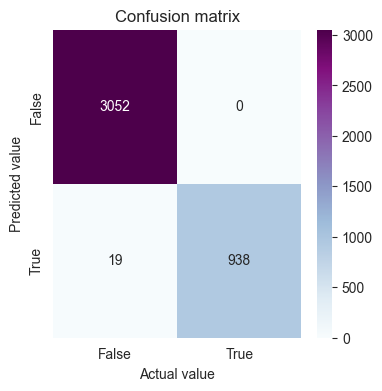

In [ ]:
plt.figure(figsize=(4,4))
conf= confusion_matrix(y_train,y_pred)
sns.heatmap(conf,annot=True,fmt='d',cmap="BuPu")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Confusion matrix")
plt.xticks([0.5,1.5],['False','True'])
plt.yticks([0.5,1.5],['False','True'])

In [ ]:
clf= classification_report(y_train,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3052
           1       1.00      0.98      0.99       957

    accuracy                           1.00      4009
   macro avg       1.00      0.99      0.99      4009
weighted avg       1.00      1.00      1.00      4009



# CONVERT IN PICKLE FILE

In [ ]:
pickle.dump(classification,open('regmode.pkl','wb'))
pkl_model= pickle.load(open('regmode.pkl','rb'))

In [ ]:
txt_mail=["hello deepak you have an emergency in office came fast"]
input_txt= vectorize.transform(txt_mail)
prediction=pkl_model.predict(input_txt)
print(prediction)
if(prediction==1):
    print("spam")
else:
    print("ham")


[0]
ham
